In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/home/friday/Documents/MS/Coursework/1st Sem/Deep Learning/ML/asssign1/dataset/linear-regression.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
                     'sulphates', 'alcohol']

In [8]:
X = df[selected_features]
y = df.quality

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [10]:
# Normalization Shit
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_val_norm = norm.fit_transform(X_val)

In [11]:
# You can do the Label Encoding shit if you have time later

In [12]:
# Scikit-Learn API Usage
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
reg = model.fit(X_train_norm, y_train)
y_pred_val = reg.predict(X_val_norm)
print(f"Mean Squared Error : {mean_squared_error(y_val, y_pred_val)}")
print(f"R2_Score : {r2_score(y_val, y_pred_val)}")

Mean Squared Error : 0.44648018067241
R2_Score : 0.3071112618080931


In [13]:
# Analytical Solution
from numpy.linalg import inv
# X_train_norm = X_train_norm.reshape((len(X_train_norm), 1))
# print(len(X_train_norm))
# linear least squares
b = inv(X_train_norm.T.dot(X_train_norm)).dot(X_train_norm.T).dot(y_train)
print(f"Thetas : {b}")
print(len(b))
# predict using coefficients
y_analytical_pred = X_train_norm.dot(b)
print(f"Mean Squared Error : {mean_squared_error(y_train, y_analytical_pred)}")
print(f"R2_Score : {r2_score(y_train, y_analytical_pred)}")

Thetas : [ 3.22677513  0.29430879  0.69505491  1.23309631  0.82955206 -0.07658579
  0.7157502   5.05177856  2.13585548  2.85365682]
10
Mean Squared Error : 0.8391994138445588
R2_Score : -0.23786785972460978


In [15]:
# Gradient Ascent Optimization
# Initialize parameters
from tqdm import tqdm
true_coefficients = np.random.rand(len(selected_features))
initial_coefficients = np.random.rand(len(selected_features))
learning_rates = [0.01, 0.001, 0.0001]
num_iterations = 1000
msre_err = []
r2_err = []

# Add a bias term to the feature matrix
# X_train_norm = np.c_[np.ones(len(X_train_norm_norm)), X_train_norm]
# print(len(X_train[0]))
# Perform gradient ascent
coefficients = initial_coefficients.copy()
for lr in learning_rates:
    for _ in tqdm(range(num_iterations)):
        # Calculate predictions and errors
        predictions = X_train_norm.dot(coefficients)
        errors = y_train - predictions
        # Calculate gradient of the log-likelihood
        gradient = X_train_norm.T.dot(errors)  # Gradient ascent, so we add the gradient
        # Normalize the gradient before updating coefficients
        gradient /= np.linalg.norm(gradient)
        # Update coefficients
        coefficients += lr * gradient

    # The final coefficients are the result of the gradient ascent
    intercept, final_coefficients = coefficients[0], coefficients[1:]
    # print("True Coefficients:", true_coefficients)
    # print("Estimated Coefficients:", final_coefficients)
    y_pred_val = X_val_norm.dot(coefficients)
    msre = mean_squared_error(y_val, y_pred_val)
    msre_err.append(msre)
    print(f"Mean Squared Error : {msre}")
    r2 = r2_score(y_val, y_pred_val)
    r2_err.append(r2)
    print(f"R2_Score : {r2}") 

100%|██████████| 1000/1000 [00:00<00:00, 2778.36it/s]


Mean Squared Error : 1.085358381421091
R2_Score : -0.684358302884331


100%|██████████| 1000/1000 [00:00<00:00, 2033.97it/s]


Mean Squared Error : 1.093406192856748
R2_Score : -0.6968476319794343


100%|██████████| 1000/1000 [00:00<00:00, 4667.80it/s]

Mean Squared Error : 1.0941096383709106
R2_Score : -0.697939303000443


In [16]:
msre_err

[1.085358381421091, 1.093406192856748, 1.0941096383709106]

In [17]:
r2_err

[-0.684358302884331, -0.6968476319794343, -0.697939303000443]

Text(0, 0.5, 'Mean Squared Error')

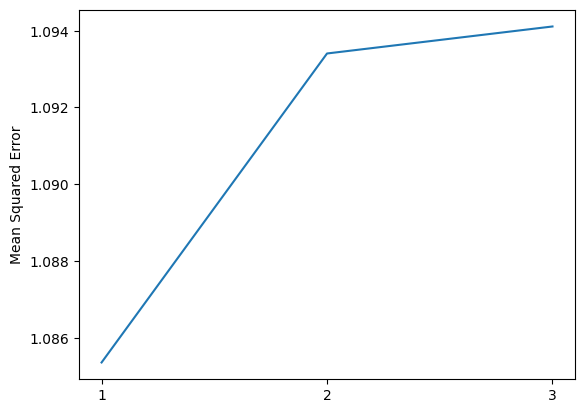

In [18]:
plt.plot(msre_err)
plt.xticks(np.arange(len(msre_err)), np.arange(1, len(msre_err)+1))
plt.ylabel("Mean Squared Error")

Text(0, 0.5, 'R2 Score')

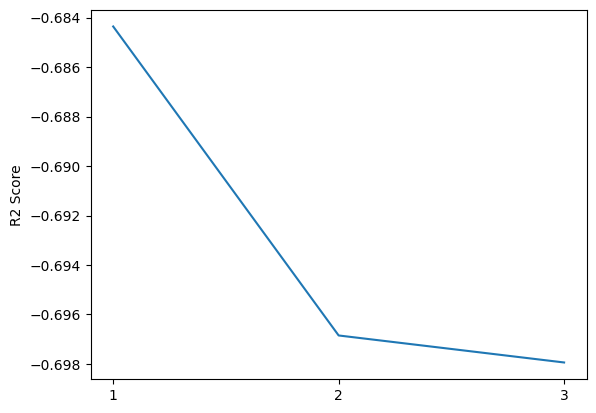

In [19]:
plt.plot(r2_err)
plt.xticks(np.arange(len(r2_err)), np.arange(1, len(r2_err)+1))
plt.ylabel("R2 Score")

In [21]:
pumpkin_df = pd.read_excel("/home/friday/Documents/MS/Coursework/1st Sem/Deep Learning/ML/asssign1/dataset/logistic-regression/Pumpkin_Seeds_Dataset.xlsx")
pumpkin_df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [23]:
features = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness']

In [24]:
X = pumpkin_df[features]
y=pumpkin_df.Class

In [33]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [35]:
# Normalization Shit
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_val_norm = norm.fit_transform(X_val)

In [39]:
import numpy as np
from sklearn.metrics import recall_score, f1_score

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)
            
            # Compute gradients
            dw = (1/num_samples) * np.dot(X.T, (predictions - y))
            db = (1/num_samples) * np.sum(predictions - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        y_pred = [1 if p >= 0.5 else 0 for p in predictions]
        return y_pred

# Example usage
if __name__ == "__main__":
    # Generate some synthetic data
    np.random.seed(42)
    
    # Initialize and train the model
    model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
    model.fit(X_train_norm, y_train)
    
    # Make predictions
    y_pred = model.predict(X_train_norm)
    accuracy = np.mean(y_pred == y_train)
    print("Accuracy:", accuracy)
    recall = recall_score(y_train, y_pred, average="binary")
    print("Recall:", recall)
    score = f1_score(y_train, y_pred, average='binary')
    print('F-Measure: %.3f' % score)

Accuracy: 0.8706666666666667
Recall: 0.8335644937586685
F-Measure: 0.861
